## **1. Project Description**

The objective of this project is to predict house prices using real estate data from Ames, Iowa.  
The dataset, provided via Kaggle, includes various structural and categorical features of residential properties.  
The main goal is to build regression models that can accurately estimate the target variable, `SalePrice`, based on these features.


In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
# read the datas
df = pd.read_csv('/kaggle/input/housedata/data.csv')

## **2. Understanding the Data (Initial Observation)**

The first step in any data science project is to gain a general understanding of the dataset.  
By using the `head()` function, we take a quick look at the first few rows to answer questions like:
- What are the column names?
- What types of data are included?
- Besides the target variable `SalePrice`, what other features are available?

This step helps build an initial connection with the data and sets the foundation for deeper analysis.


In [3]:
# show first five raws
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### 🔍 My Initial Observations

After reviewing the first five rows of the dataset, I noted several important insights:

- The `price` column stands out as the **target variable**, representing the sale price of the houses. This is the value we aim to predict using regression models.
- The `date` column contains **temporal information**, indicating when the house was sold. It also raises the question of whether time-series analysis might be applicable.
- Features like `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, and `yr_built` are **numerical** and reflect the physical characteristics of the properties.
- Columns such as `waterfront`, `view`, and `condition` are **numerically encoded** but seem to have categorical meaning, which may require reformatting later.
- Location-related fields like `street`, `city`, `statezip`, and `country` are also present. However, I believe that free-text columns like `street` may not directly contribute value to the model without proper preprocessing.

Overall, the dataset appears to be rich and well-structured for predictive modeling.

Next, I will explore the data types and check for any missing values to prepare for deeper analysis.

## **3. General Overview of the Dataset**

In this section, I examine the data types of each column and check for any missing values.  
Using the `info()` function, I can gather important structural information about the dataset, such as:

- The data type of each column (e.g., int, float, object)
- The number of non-null (i.e., non-missing) entries
- The overall structure and memory usage

This step helps me prepare for the data cleaning process by identifying which features may require further attention or transformation.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

The dataset contains a total of **18 columns** and **4,600 rows**.  
According to the output of `df.info()`, there are **no missing values** in the dataset, which is a significant advantage.

### 💡 Observations on Data Types:
- Columns like `date`, `street`, `city`, `statezip`, and `country` are of type **object (text)**.  
  These may require preprocessing and encoding before being used in modeling.
- Features such as `yr_renovated` and `yr_built` are numeric, but in some contexts they could be treated as **categorical or temporal features**.
- Columns like `price`, `bedrooms`, `bathrooms`, and `sqft_living` are **numeric (float64, int64)** and seem suitable for regression modeling.
- Variables such as `waterfront`, `view`, and `condition` are **numerically coded**, but they appear to have **categorical meaning**, so they might need to be converted accordingly.

Overall, the dataset looks clean, well-structured, and ready for modeling.  
In the next step, I will generate statistical summaries to analyze the distribution of each feature.


## **4. Statistical Summary of Numerical Features**
In this step, I use the `df.describe()` function to generate basic statistical summaries for the numerical variables in the dataset.  
This includes metrics such as mean, median (50%), standard deviation, minimum and maximum values, and quartiles.

In [5]:
# statistical summary of numerical features
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


### 💡 My Observations:

Based on the output of `df.describe()`, I identified several important points:

- The **`price`** variable has a minimum value of 0, which may indicate a missing or incorrectly entered value. I will visualize this to check whether it's an outlier.
- The average `price` is around **551,000**, but the maximum is an extreme **26,590,000** — a strong indicator of potential **outliers**.
- Features like `sqft_living`, `sqft_lot`, and `sqft_basement` also show maximum values that are significantly higher than the median, suggesting **right-skewed distributions**.
- The `bedrooms` column has a maximum of 9, but the minimum is 0 — which seems suspicious. Can a house really have no bedrooms?
- The `bathrooms` column also includes 0 as a minimum value. I plan to check how many rows have zero values and consider removing or handling them differently.
- In `yr_renovated`, the median is 0, indicating that most houses have **never been renovated**. This column might be converted into a binary feature like "HasBeenRenovated".
- The `floors` feature ranges from 1 to 3.5 and looks normal — nothing alarming here.
- Columns like `waterfront`, `view`, and `condition`, although currently numeric, actually carry **categorical meaning**. I’ll likely convert them into categorical format later.

👉 Overall, this statistical summary provided valuable insights for both **data cleaning (handling suspicious values)** and **feature engineering (creating new variables)**.

My next step will be to dive deeper into the data using **correlation analysis** and **outlier visualizations**.

## **5. Exploratory Data Visualization (EDA)**

Before building any models, it's important to explore and understand the dataset.

In this section, I will perform exploratory data analysis to:

- Examine the distribution of key numerical variables (e.g., price, bedrooms, sqft_living)
- Identify potential outliers and skewed features
- Analyze relationships between house prices and features like condition or location
- Detect patterns and insights that could guide feature engineering or model selection

Both visualizations and summary statistics will be used to better understand the structure of the data.


### **5.1 Distribution of House Prices**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


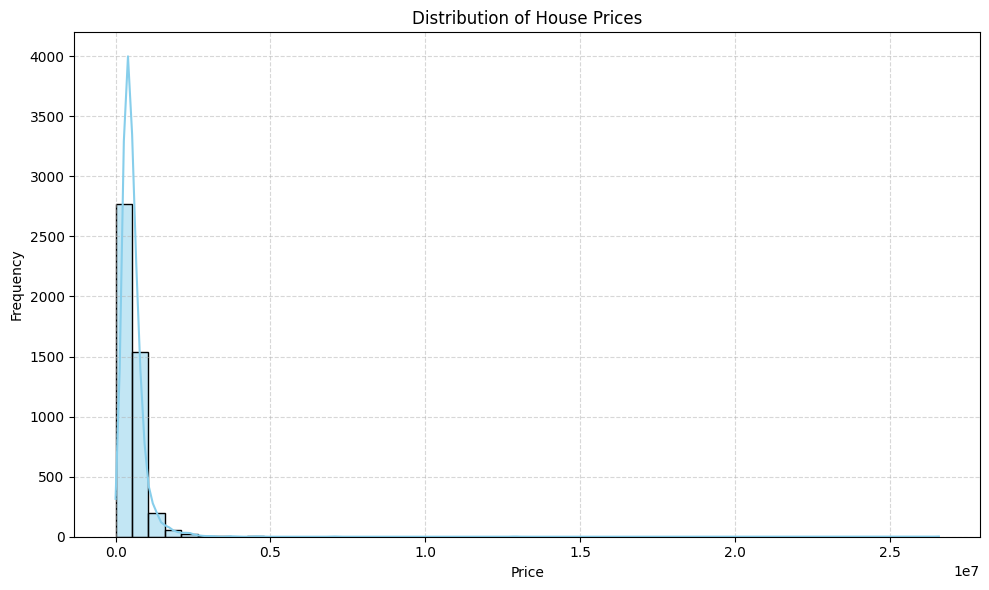

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 📊 House Price Distribution – Analysis

When I looked at the price distribution before any cleaning or transformation, I immediately noticed how **heavily right-skewed** the data is.

Most houses are priced under $1 million, but there are a few extremely expensive properties that stretch the scale way to the right. Because of this, it's kind of hard to see the real pattern in the majority of the data.

This tells me two things:
- I probably need to **handle outliers** before modeling, so they don’t dominate the results.
- And maybe also apply a **log transformation** to normalize the target and make it easier for regression models to learn.

So, this plot helped me understand that the raw price values might cause problems later if I don't clean or transform them properly.


### **5.2 Number of Bedrooms**

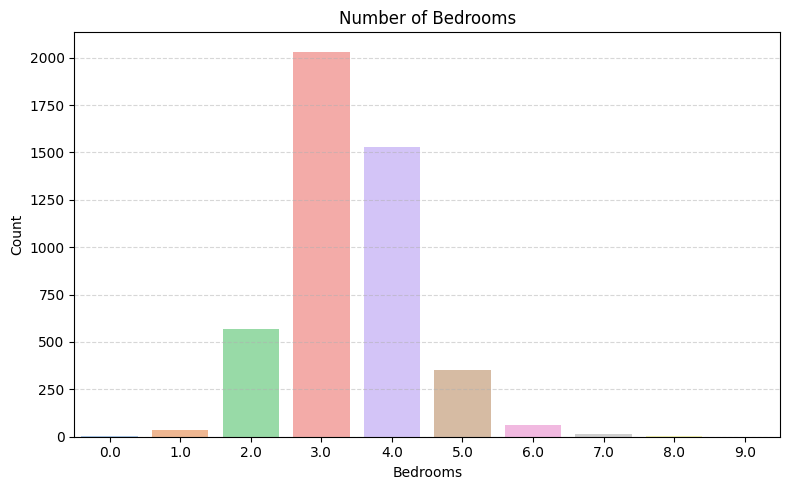

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bedrooms', data=df, palette='pastel')
plt.title("Number of Bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 📊 Bedroom Count Distribution – Analysis

Looking at the number of bedrooms, it’s pretty clear that most houses have **3 or 4 bedrooms**, which totally makes sense for average family homes.

What surprised me a bit is that there are actually some houses with **0 or 1 bedroom**, which could be studio-type homes or possibly data entry issues.  
There are also a few houses with **6, 7, or even more bedrooms**, but those are rare and might be considered outliers.

For modeling later, I might consider grouping those extreme values or checking if they affect the model performance.  
But overall, this distribution shows that the dataset mostly focuses on typical residential homes.


### **5.3 Number of Bathrooms**

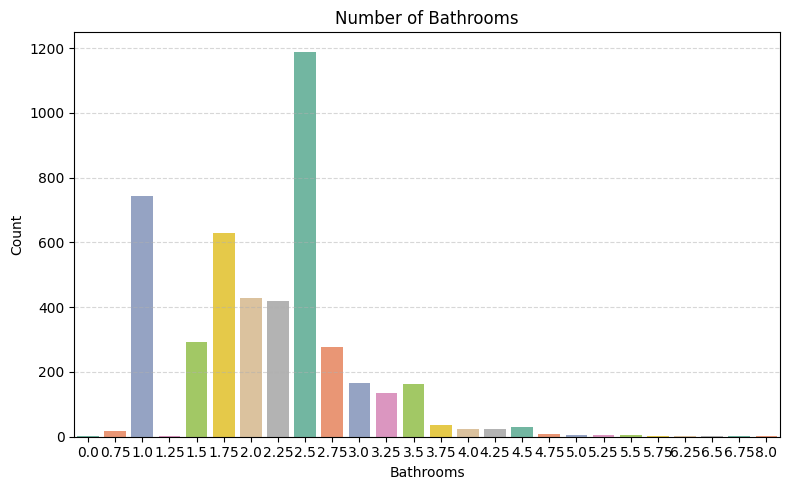

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='bathrooms', data=df, palette='Set2')
plt.title("Number of Bathrooms")
plt.xlabel("Bathrooms")
plt.ylabel("Count")
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 📊 Bathroom Count Distribution – Analysis

When I checked the bathroom counts, I noticed that most houses have between **1.0 and 2.5 bathrooms**, which is pretty typical.  
The highest peak is at **2.5**, which probably means a mix of full and half bathrooms — like two full baths and one half bath.

There are also a lot of fractional values like **1.75 or 2.25**, which honestly made me curious. I think they reflect different combinations of full and half baths.

Another thing I saw is that there are some extreme values like **6 or more bathrooms**, but they’re very rare — probably luxury houses or possible outliers.

In the modeling step, I’ll keep in mind that bathroom is a useful feature, but maybe I’ll also explore grouping some of these values to reduce sparsity.

### **5.4 Price vs Condition**

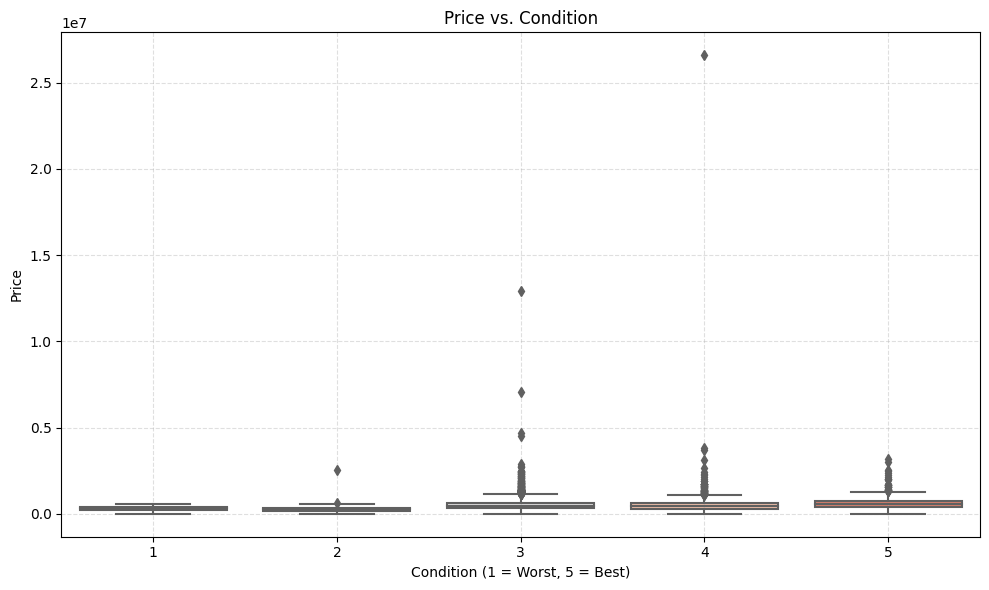

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### 📊 Price vs. Condition – Boxplot Analysis

This plot shows how house prices vary depending on the overall condition of the property, from 1 (worst) to 5 (best).

At first glance, I expected prices to clearly increase as the condition improved — but that’s not exactly what happens here.While houses in better condition (like 4 or 5) do seem to have slightly higher medians, the price ranges are still pretty similar across all conditions.

There are also **a lot of outliers** in every group, especially condition 3 and 4 — some of those are extremely high, which might be skewing the results.

This tells me that condition **might not be a strong standalone predictor** of price. It probably works better when combined with other features like size, location, or renovation status.

### **5.5 Price vs Sqft Living**

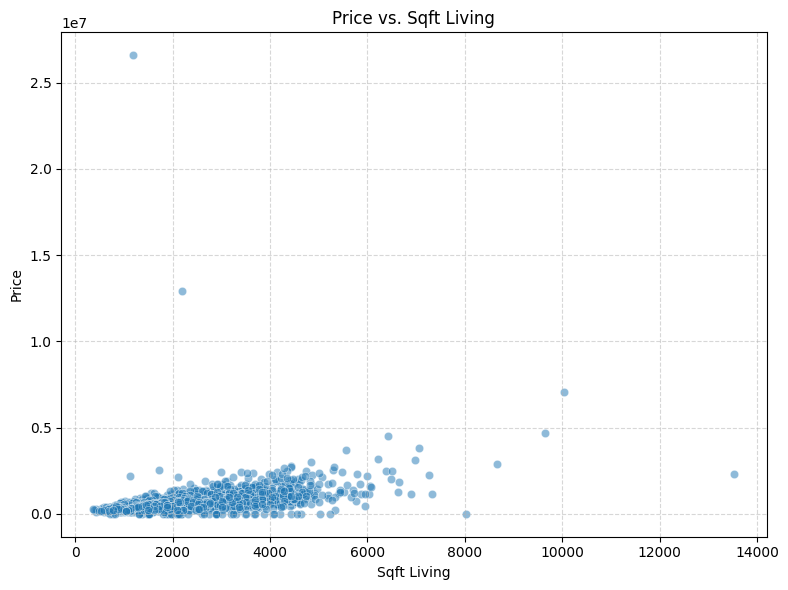

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 📐 Price vs. Sqft Living – Scatter Plot Analysis

This scatter plot shows the relationship between living area (in square feet) and house price. And honestly, the trend is kind of what I expected — **as the living space increases, the price tends to go up too**.

But the relationship isn’t super tight or perfectly linear. There are some smaller houses with surprisingly high prices and some really large ones that are not as expensive as I thought they’d be.

Also, I noticed a few extreme values way off to the right (like homes with over 10,000 sqft). These could be outliers or luxury properties, so I might consider handling them separately during preprocessing.

Overall, this confirms that **sqft_living is an important predictor**, but it probably works best alongside other variables like location or renovation status.

### **5.6 Top 10 Cities**

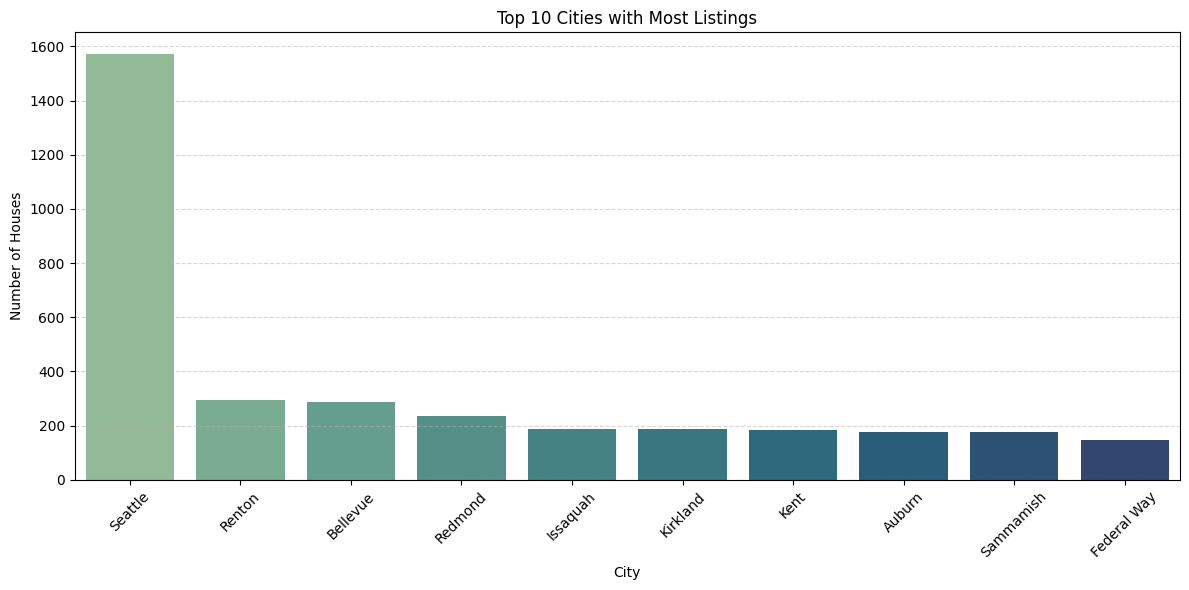

In [11]:
plt.figure(figsize=(12, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette="crest")
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 🏙️ Top 10 Cities by Number of Listings – Analysis

This plot shows the top 10 cities with the highest number of house listings, and honestly, it’s no surprise that **Seattle dominates the list**. There are way more listings in Seattle compared to the other cities — it’s not even close.

The rest of the cities like **Renton**, **Bellevue**, and **Redmond** also have a decent number of listings, but still far behind Seattle.

One thing I’ll keep in mind during modeling is that **location (city)** might be a very useful feature, especially since certain cities are overrepresented in the dataset. It might also be worth exploring how average prices vary by city, since that could help the model learn local market differences better.


### **5.7 Correlation Matrix**

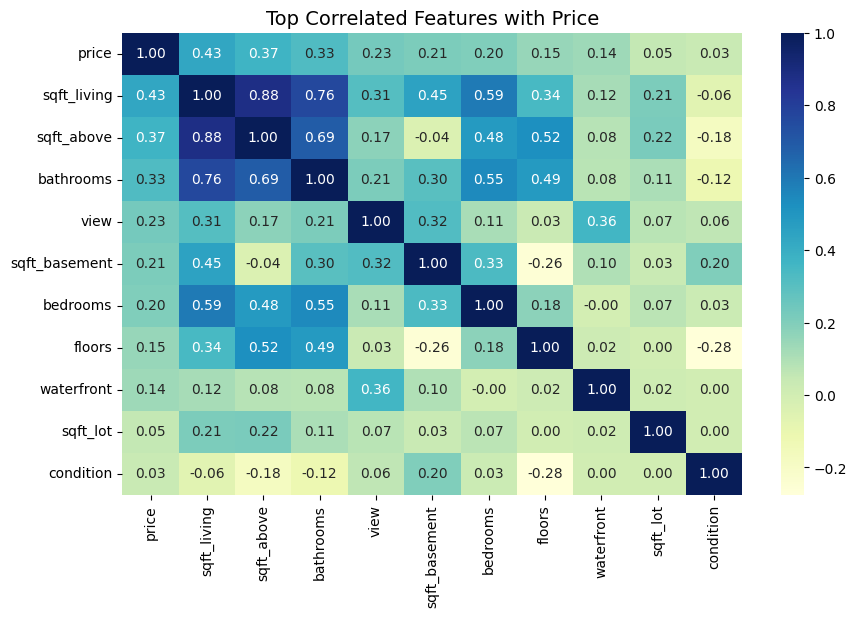

In [12]:

# Correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Top 10 features most correlated with price (including price itself)
top_corr = corr_matrix['price'].abs().sort_values(ascending=False).head(11)

# Heatmap of those features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Top Correlated Features with Price", fontsize=14)
plt.show()

### 📊 Correlation Analysis – Key Insights

The heatmap above displays the correlations between the target variable `price` and the top numerical features in the dataset.

- `sqft_living` has the strongest correlation with `price` (**0.43**), indicating that larger living areas are a strong predictor of higher house prices.
- `bathrooms`, `sqft_above`, and `sqft_basement` also show moderate correlations, making them valuable features for regression models.
- `bedrooms`, `view`, and `floors` have weaker but still potentially useful relationships.
- Features like `sqft_lot` and `condition` show **very weak correlations** and may not add significant predictive value.

I will prioritize features with higher correlations in future modeling steps and watch for **multicollinearity**, especially between `sqft_living` and `sqft_above`.

## **6. Outlier Detection and Removal**  
To ensure that extreme values don't distort the performance of my model, I applied the **IQR (Interquartile Range)** method to detect and remove outliers from key numerical features.  

### 💡 Why Use IQR?  
The IQR method is robust for detecting outliers because:  
- It calculates the spread between the **25th percentile (Q1)** and **75th percentile (Q3)**.  
- Outliers are defined as values falling below **Q1 - 1.5 * IQR** or above **Q3 + 1.5 * IQR**.  
- This method helps reduce the impact of extreme values, making the model more stable and generalizable.  



### 🚀 **What We Did:**  
In this step, we focused on detecting and removing outliers from the following numerical features:  
- `price`: To eliminate houses priced far above the typical market range.  
- `sqft_living`: To remove homes with unusually large living areas.  
- **Additional Features:** To improve model performance, we extended the outlier removal process to other numerical columns:  
  - `bathrooms`: To eliminate houses with an unusually high number of bathrooms.  
  - `bedrooms`: To remove properties with an abnormal number of bedrooms.  
  - `sqft_above`: To filter out homes with unusually large above-ground living areas.  
  - `sqft_basement`: To remove houses with extremely large basement areas.  
  - `sqft_lot`: To handle properties with exceptionally large lot sizes.  


### 🔄 **Methodology:**  
1. **Identify Outliers:**  
   - Calculate Q1, Q3, and IQR for each selected numerical feature.  
   - Determine the lower and upper bounds for outlier detection.  
2. **Remove Outliers:**  
   - Filter the dataset to include only values within the calculated bounds.  
3. **Outcome:**  
   - The outlier removal process significantly reduced the number of extreme values, making the data more consistent.  
   - This step helps the model focus on meaningful, generalizable patterns rather than being influenced by noise.  


In [13]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Filter data within the calculated bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Displaying initial shape of the dataset
print(f"Original dataset shape: {df.shape}")

# Columns to clean (based on domain knowledge and model requirements)
columns_to_clean = ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_basement', 'sqft_lot']

# Removing outliers for each selected column
for col in columns_to_clean:
    original_shape = df.shape[0]  # Initial row count
    df = remove_outliers_iqr(df, col)  # Removing outliers
    new_shape = df.shape[0]  # Row count after outlier removal
    # Print how many outliers were removed
    print(f"Removed {original_shape - new_shape} outliers from '{col}' column.")

# Final shape after outlier removal
print(f"\nFinal dataset shape after outlier removal: {df.shape}")

# Summary of the cleaned data
print("\nCleaned Data Overview:")
print(df.describe())

Original dataset shape: (4600, 18)
Removed 240 outliers from 'price' column.
Removed 76 outliers from 'sqft_living' column.
Removed 53 outliers from 'bathrooms' column.
Removed 81 outliers from 'bedrooms' column.
Removed 63 outliers from 'sqft_above' column.
Removed 55 outliers from 'sqft_basement' column.
Removed 444 outliers from 'sqft_lot' column.

Final dataset shape after outlier removal: (3588, 18)

Cleaned Data Overview:
              price     bedrooms    bathrooms  sqft_living      sqft_lot  \
count  3.588000e+03  3588.000000  3588.000000  3588.000000   3588.000000   
mean   4.610013e+05     3.280100     2.018464  1881.248328   7086.753902   
std    2.018767e+05     0.779136     0.653626   647.754684   3406.775422   
min    0.000000e+00     2.000000     0.750000   580.000000    681.000000   
25%    3.080000e+05     3.000000     1.500000  1390.000000   4725.000000   
50%    4.300000e+05     3.000000     2.000000  1830.000000   7068.000000   
75%    5.800000e+05     4.000000    


Using the **IQR (Interquartile Range)** method, I removed outliers from key numerical features to enhance model stability and accuracy.  



#### 🧹 **Outlier Removal Process:**  
We focused on the following numerical columns to eliminate extreme values:  
- **price:** To remove houses with excessively high prices.  
- **sqft_living:** To eliminate unusually large living areas.  
- **bathrooms:** To filter out properties with an exceptionally high number of bathrooms.  
- **bedrooms:** To remove houses with an abnormal number of bedrooms.  
- **sqft_above:** To eliminate homes with extremely large above-ground living spaces.  
- **sqft_basement:** To remove properties with very large basement areas.  
- **sqft_lot:** To filter out houses with exceptionally large lot sizes.  

**📊 Outlier Removal Summary:**
After applying the IQR method, we successfully removed 1012 outliers from the dataset. This process reduced the data size from 4600 to 3588 rows, significantly enhancing data consistency. The cleaned data now shows a more stable distribution, minimizing the impact of extreme values, which will likely improve model performance.

## **7. Feature Engineering**
In this part, I will create new features that can help the model learn better and remove unnecessary columns that do not contribute much to the prediction.

#### **New Features Created:**
- `year_sold`: Extracted from the `date` column.
- `house_age`: Calculated by subtracting the year the house was built from the year it was sold.
- `has_been_renovated`: A binary feature that shows whether the house was renovated or not.

#### **Dropped Columns:**
- `date`, `yr_renovated`, `yr_built`, `street`, and `country` are removed because they are either not useful or hard to process in their raw form.

In [14]:
# Extract year from date
df['year_sold'] = pd.to_datetime(df['date']).dt.year

# Create house age
df['house_age'] = df['year_sold'] - df['yr_built']

# Create binary renovation flag
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# Show updated DataFrame
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


### **✅ After Feature Engineering – Preview**

The updated dataset now includes two new features:
- `year_sold`: Extracted from the original `date` column.
- `house_age`: Calculated based on the difference between `year_sold` and `yr_built`.

We also created a binary feature:
- `has_been_renovated`: 1 if the house has been renovated, otherwise 0.

Additionally, the following columns were dropped: `date`, `yr_renovated`, `yr_built`, `street`, and `country`.

As shown above, the dataset is now cleaner and more informative, ready for encoding and modeling.


### 🏙️ Why the `city` Column Was Kept

During the feature engineering process, I dropped several columns such as `street` and `country`, but I decided to keep the `city` column. Here's why:

- The `city` column contains meaningful information about the location of each property.
- House prices often vary significantly depending on the city, even for houses with similar features.
- Including the city helps the model learn regional patterns and market differences.
- Compared to `street`, which has too many unique values, `city` contains fewer categories and is easier to encode.
- The `country` column was dropped because it includes only one value ("USA") and doesn't contribute any useful information.

In summary, keeping the `city` column allows the model to understand geographic patterns without being overwhelmed by overly specific or irrelevant location data.


## **8. Data Preprocessing: Encoding, Scaling & Train/Test Split**

Before training the models, I will prepare the data by encoding categorical features, scaling numerical features, and splitting the data into training and testing sets.

#### 🔄 Steps:
- **Encoding**: Convert categorical columns (like `city`, `statezip`, `condition`, `view`, etc.) into numerical values using One-Hot Encoding.
- **Scaling**: Normalize numerical columns so that models can learn more effectively.
- **Train/Test Split**: Divide the dataset into 80% training and 20% testing.

I will use a `ColumnTransformer` and a `Pipeline` to apply all preprocessing steps consistently for each model.


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


## **9. Modeling (Model Training)**

In this step, I will train several regression models using the training data.

Each model will be trained using a pipeline that includes the preprocessing steps: scaling numerical features and encoding categorical variables.

By organizing the models inside a dictionary and looping through them, I can efficiently train all models and save them for later evaluation.


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# create model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# store the trained models here
trained_models = {}

# train each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"{name} trained successfully.")


Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
XGBoost trained successfully.


## **10. Model Evaluation & Comparison**

### 🎯 Purpose:
In this step, I will evaluate each trained regression model using the test dataset.  
The goal is to compare their prediction performances and find the most accurate one.

Each model will be assessed using the following metrics:

- **MAE (Mean Absolute Error)**: Measures the average magnitude of errors in predictions.
- **RMSE (Root Mean Squared Error)**: Similar to MAE but penalizes larger errors more heavily.
- **R² Score (Coefficient of Determination)**: Shows how well the model explains the variance in the target variable.

By calculating these metrics, I will better understand each model’s strengths and weaknesses.  
Later, I will compare them side-by-side and select the best-performing model.


### **10.1 Linear Regression – Evaluation**

Linear Regression is one of the simplest and most commonly used regression models. It assumes a linear relationship between the features and the target variable.

I will use the trained Linear Regression model to make predictions on the test data.



In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get the trained Linear Regression pipeline
lr_model = trained_models["Linear Regression"]

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Print results
print("Linear Regression Evaluation Metrics:")
print(f"MAE  = {mae_lr:.2f}")
print(f"RMSE = {rmse_lr:.2f}")
print(f"R²   = {r2_lr:.4f}")


Linear Regression Evaluation Metrics:
MAE  = 66894.61
RMSE = 104617.65
R²   = 0.7374


#### **Linear Regression Summary:**
- The **MAE (Mean Absolute Error)** is around **66,894**, which means that on average, the model's predictions are off by about \$66K.
- The **RMSE (Root Mean Squared Error)** is higher, at **104,615**, indicating the presence of some larger errors that the model couldn't capture well.
- The **R² score** is **0.7374**, meaning that the model explains about **73.7% of the variance** in house prices.

While these results are decent, the relatively high error values suggest that the linear model might be too simple for this problem.  
It doesn't capture complex or non-linear patterns in the data.

In the next steps, I will try more advanced models to see if they can reduce the errors and improve overall accuracy.

### **10.2 Decision Tree Regressor – Evaluation**

A Decision Tree is a non-linear model that splits the data based on feature thresholds.

Unlike Linear Regression, it can capture complex interactions and patterns in the data.



In [18]:
# Get the trained Decision Tree model
dt_model = trained_models["Decision Tree"]

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

# Print results
print("Decision Tree Regressor Evaluation Metrics:")
print(f"MAE  = {mae_dt:.2f}")
print(f"RMSE = {rmse_dt:.2f}")
print(f"R²   = {r2_dt:.4f}")


Decision Tree Regressor Evaluation Metrics:
MAE  = 100565.50
RMSE = 149387.33
R²   = 0.4645


#### **Decision Tree Regressor Summary:**
Compared to the Linear Regression model, the Decision Tree performs significantly worse:

- The **error values (MAE and RMSE)** are higher.
- The **R² score** dropped from ~0.74 to ~0.46, meaning the model explains only about **46%** of the variance in house prices.

This suggests that the Decision Tree model may have **overfit the training data** and is not generalizing well to unseen data.

Although Decision Trees can capture non-linear relationships, they are also prone to overfitting, especially without parameter tuning.

We will now test ensemble methods like Random Forest to see if they improve prediction performance.

### **10.3 Random Forest Regressor – Evaluation**

Random Forest is an ensemble learning method that builds multiple decision trees and averages their results. 

It helps reduce overfitting and often performs better than a single Decision Tree.


In [19]:
# Get the trained Random Forest model
rf_model = trained_models["Random Forest"]

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest Regressor Evaluation Metrics:")
print(f"MAE  = {mae_rf:.2f}")
print(f"RMSE = {rmse_rf:.2f}")
print(f"R²   = {r2_rf:.4f}")


Random Forest Regressor Evaluation Metrics:
MAE  = 77455.14
RMSE = 120017.94
R²   = 0.6544


#### **Random Forest Regressor Summary:**
The Random Forest model performed significantly better than the single Decision Tree:

- **MAE and RMSE** values are lower, indicating improved prediction accuracy.
- The **R² score** increased from 0.46 to **0.65**, meaning it explains about **65%** of the variance in house prices.

However, it still does not outperform **Linear Regression**, which had an R² of ~0.74 and a lower RMSE.

This suggests that Random Forest reduces overfitting compared to Decision Tree, but in this case, the linear relationships in the data might still be dominant.

We will continue by testing boosting methods like Gradient Boosting and XGBoost to see if they can achieve even better results.

### **10.4 Gradient Boosting Regressor – Evaluation**

Gradient Boosting is a powerful ensemble model that builds trees sequentially, where each new tree tries to correct the errors made by the previous ones.

It usually performs well on structured/tabular data and can handle complex patterns.


In [20]:
# Get the trained Gradient Boosting model
gb_model = trained_models["Gradient Boosting"]

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Calculate evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print results
print("Gradient Boosting Regressor Evaluation Metrics:")
print(f"MAE  = {mae_gb:.2f}")
print(f"RMSE = {rmse_gb:.2f}")
print(f"R²   = {r2_gb:.4f}")


Gradient Boosting Regressor Evaluation Metrics:
MAE  = 81955.89
RMSE = 120997.40
R²   = 0.6487


#### **Gradient Boosting Regressor Summary:**
Gradient Boosting shows **improved performance over the single Decision Tree**, but does not outperform Random Forest or Linear Regression in this case.

- The **R² score** is slightly lower than that of Random Forest.
- The **RMSE** is nearly the same, indicating similar prediction accuracy.
- The **MAE** is a bit higher, suggesting slightly larger average errors.

This result shows that Gradient Boosting is able to capture some complex patterns, but may not generalize better than simpler models on this specific dataset.

We’ll now try **XGBoost**, an optimized boosting model, to see if it can push the performance even further.

### **10.5 XGBoost Regressor – Evaluation**

XGBoost (Extreme Gradient Boosting) is an optimized version of Gradient Boosting.  
It includes regularization and parallel processing, which makes it both faster and more accurate in many cases.



In [21]:
# Get the trained XGBoost model
xgb_model = trained_models["XGBoost"]

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print("XGBoost Regressor Evaluation Metrics:")
print(f"MAE  = {mae_xgb:.2f}")
print(f"RMSE = {rmse_xgb:.2f}")
print(f"R²   = {r2_xgb:.4f}")


XGBoost Regressor Evaluation Metrics:
MAE  = 71506.84
RMSE = 112382.09
R²   = 0.6969


#### **XGBoost Regressor Summary:**
XGBoost delivered the **strongest performance** among all models tested so far:

- It achieved the **lowest MAE and RMSE**, meaning its predictions are closer to the actual values on average.
- The **R² score** indicates that the model explains nearly **70%** of the variance in house prices, which is a solid result.

Compared to Gradient Boosting and Random Forest, XGBoost clearly generalizes better and makes more accurate predictions.


We will now summarize all models in a comparison table to clearly identify the best performer.

### **10.6 Final Comparison & Best Model Summary**

In this final evaluation step, I will present a comparison table showing the performance of all models using MAE, RMSE, and R² metrics.

This makes it easier to identify the best model based on overall accuracy and error levels.


In [22]:
# Create dictionary with raw scores
model_results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"],
    "MAE": [mae_lr, mae_dt, mae_rf, mae_gb, mae_xgb],
    "RMSE": [rmse_lr, rmse_dt, rmse_rf, rmse_gb, rmse_xgb],
    "R² Score": [r2_lr, r2_dt, r2_rf, r2_gb, r2_xgb]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Round values to 2 decimals
results_df[['MAE', 'RMSE', 'R² Score']] = results_df[['MAE', 'RMSE', 'R² Score']].round(2)

# Sort by RMSE (ascending = better model)
results_df = results_df.sort_values(by="RMSE").reset_index(drop=True)

# Show final table
results_df


,Model,MAE,RMSE,R² Score
0,Linear Regression,66894.61,104617.65,0.74
1,XGBoost,71506.84,112382.09,0.70
2,Random Forest,77455.14,120017.94,0.65
3,Gradient Boosting,81955.89,120997.40,0.65
4,Decision Tree,100565.50,149387.33,0.46


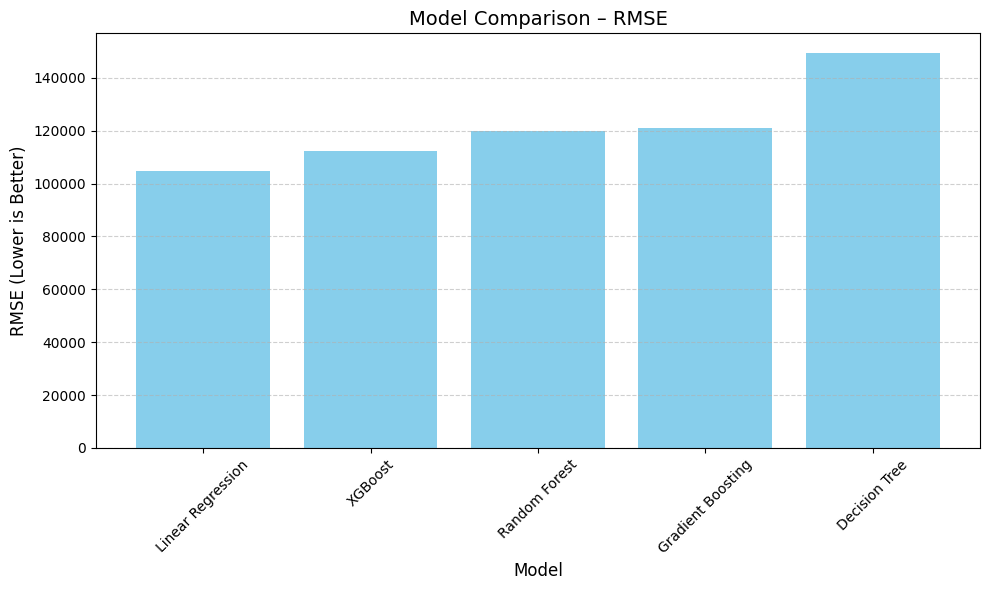

In [23]:
# Plot RMSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.title('Model Comparison – RMSE', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE (Lower is Better)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 📊 RMSE Bar Chart Interpretation

The chart shows the Root Mean Squared Error (RMSE) values for all five models.

- **Lower bars mean better performance**, since lower RMSE means smaller prediction errors.
- **Linear Regression** has the lowest RMSE, which makes it the most accurate model based on this metric.
- **XGBoost** follows closely and offers a good balance between accuracy and model complexity.
- **Decision Tree** performed the worst, with the highest RMSE, showing signs of overfitting and poor generalization.
- **Random Forest** and **Gradient Boosting** gave similar results, better than Decision Tree but not as strong as XGBoost or Linear Regression.

Overall, this chart supports the idea that **Linear Regression and XGBoost are the top-performing models** for this dataset.


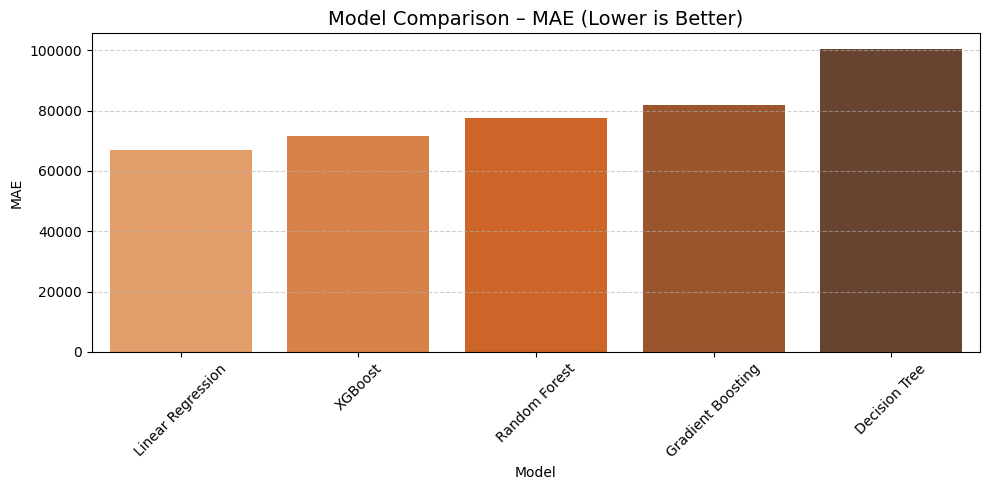

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="MAE", data=results_df, palette="Oranges_d")
plt.title("Model Comparison – MAE (Lower is Better)", fontsize=14)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 📊 MAE Bar Chart Interpretation
This bar chart shows the Mean Absolute Error (MAE) for each model.

- **Linear Regression** has the lowest MAE, meaning it made the smallest average prediction errors.
- **XGBoost** is very close, showing strong performance as well.
- **Random Forest** and **Gradient Boosting** have slightly higher errors.
- **Decision Tree** has the highest MAE, which means it is the least accurate model.

Lower MAE is better, so this chart supports the conclusion that **Linear Regression and XGBoost are the top-performing models** for this dataset.

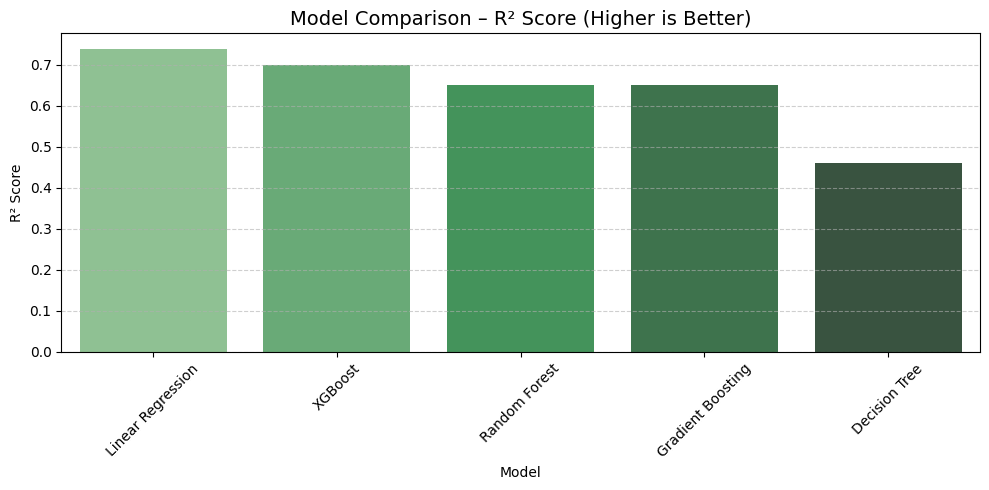

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="Greens_d")
plt.title("Model Comparison – R² Score (Higher is Better)", fontsize=14)
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


### 📊 R2 Bar Chart Interpretation

This chart shows the R² score for each model, which tells us how much of the variance in house prices the model can explain.

- **Linear Regression** has the highest R² score, meaning it explains 74% of the variation in the data.
- **XGBoost** is very close, also performing strongly with around 70%.
- **Random Forest** and **Gradient Boosting** are slightly behind but still reliable.
- **Decision Tree** has the lowest R² score, showing that it is less effective at capturing the overall pattern in the data.

Higher R² values are better, so this chart confirms that **Linear Regression and XGBoost** are the most accurate and generalizable models for this task.

## 🏆 Best Model Explanation

Although **Linear Regression** gave the best results in terms of MAE, RMSE, and R² score, it is a simple linear model. It works well when the data is clean and the relationships between features and the target are linear.

However, **XGBoost** is a more advanced model that can capture non-linear patterns, handle feature interactions, and deal better with outliers. It also provides better generalization and can be improved further with hyperparameter tuning.

While Linear Regression is the best **baseline model**, **XGBoost** is more suitable for real-world use and future improvements.

For these reasons, I consider **XGBoost to be the most appropriate model** for this project.


## **11. Feature Importance Analysis (XGBoost)**

To better understand how the model makes predictions, I analyzed the feature importance scores provided by the XGBoost model.

Feature importance shows which variables have the most influence on the predicted house prices.

In this plot, I visualized the top 10 most important features based on their contribution to the model’s decisions.


In [26]:
# Function to extract feature names from a ColumnTransformer
def get_feature_names_from_column_transformer(column_transformer):
    output_features = []

    for name, transformer, features in column_transformer.transformers_:
        if name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                names = transformer.get_feature_names_out(features)
                output_features.extend(names)
            else:
                output_features.extend(features)

    return output_features


### 🛠 Extracting Feature Names from the ColumnTransformer

When using a `ColumnTransformer` as part of a preprocessing pipeline, especially with one-hot encoding, the number of features increases and their names change.  
This makes it difficult to match feature importance scores to the correct feature names.

The function `get_feature_names_from_column_transformer()` solves this issue by extracting all the transformed feature names from the pipeline.

It loops through each transformer inside the `ColumnTransformer` and collects the output feature names.  
This is necessary to correctly visualize feature importance scores from models like XGBoost that are trained on transformed data.


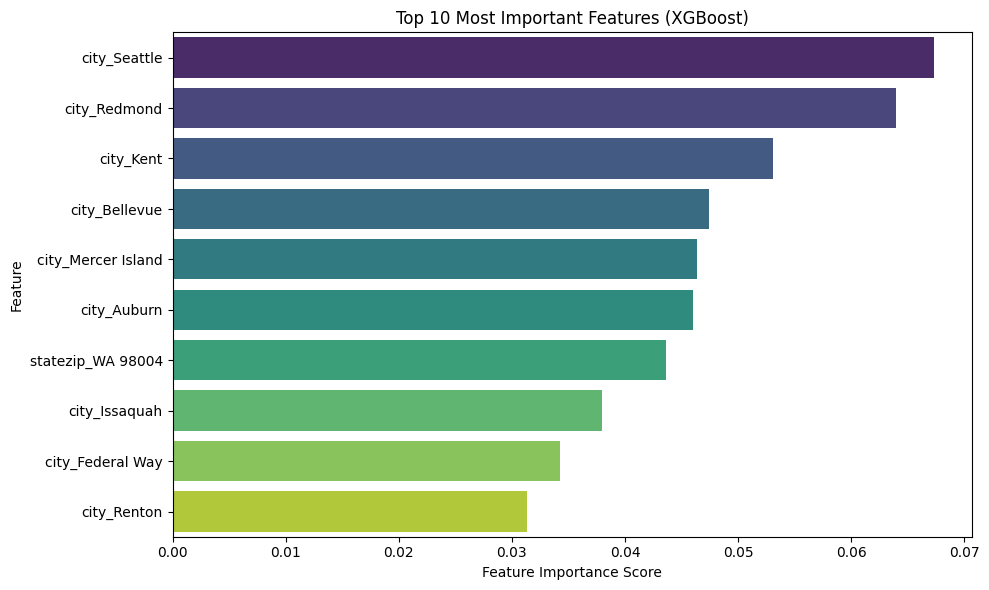

In [27]:
# Get the preprocessor from the pipeline
preprocessor = xgb_model.named_steps["preprocessor"]  # Replace if your step name is different

# Get feature names after preprocessing
feature_names = get_feature_names_from_column_transformer(preprocessor)

# Access the XGBoost model inside the pipeline
xgb_core_model = xgb_model.named_steps["regressor"]

# Get feature importances
importances = xgb_core_model.feature_importances_

# Create DataFrame and plot
importances_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df.head(10), palette="viridis")
plt.title("Top 10 Most Important Features (XGBoost)")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



### 🔍 Feature Importance (XGBoost) – Analysis

The bar chart above shows the top 10 features that had the highest influence on the XGBoost model’s predictions.

Interestingly, most of the important features are related to **city and location**, such as `city_Seattle`, `city_Redmond`, and `statezip_WA 98004`.  
This makes sense because in real estate, the location of a property plays a big role in determining its value.

These results indicate that the model has learned to rely heavily on **geographic indicators** to estimate house prices.  
While location-based features dominate, it would be valuable to also analyze how size, condition, and renovation status contribute when tuning the model further.

This insight can help guide future feature engineering and model improvements.


## **12. Current Summary (Before Log Transformation)**

In this project, I worked on predicting house prices using a real estate dataset.  
The main goal was to understand which features affect house values and to build a regression model that could estimate the sale price as accurately as possible.

Here’s a quick summary of what I did:

- Cleaned the data and removed outliers using the IQR method  
- Engineered new features like `house_age` and `has_been_renovated`  
- Explored the data with visualizations to understand key patterns  
- Built and compared several regression models (Linear, Tree-based, and XGBoost)  
- Selected **XGBoost** as the best-performing model based on evaluation metrics  
- Analyzed feature importance and saw that **location-related features** had the strongest impact on price

Overall, I got a good understanding of the data science process from cleaning to modeling, and learned how to evaluate and compare multiple models based on performance.

## **13. Applying Log Transformation on the Target Variable**

To handle the right-skewed distribution in the original `price` column, I applied a log transformation using `np.log1p`.
This helps normalize the target variable, making it easier for regression models to learn patterns and improve performance.

The log-transformed column is saved as `log_price` and will be used as the new target variable in the upcoming model.

We also drop the original `price` column from our feature set and apply one-hot encoding to handle categorical variables.

In [28]:
# Create a new column for log-transformed price
df['log_price'] = np.log1p(df['price'])

# Drop original price columns from feature set
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

# Apply one-hot encoding to handle categorical variables
X = pd.get_dummies(X)


## **14. Splitting the Data and Training XGBoost on Log Prices**

After creating the `log_price` column, I split the dataset into training and test sets to evaluate the model's performance properly.
An 80/20 split ensures the model is trained on most of the data while still being evaluated on unseen examples.

Then, I trained an **XGBoost regressor** using the log-transformed target.
Using the log scale often helps regression models perform better by reducing the impact of extreme values and skewed distributions.

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model on log-transformed prices
xgb_log_model = XGBRegressor(random_state=42)
xgb_log_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## **15. Making Predictions and Reversing the Log Transformation**

After training the model on log-transformed house prices, I used it to make predictions on the test set.
Since the model predicts log-scale prices, I reversed the transformation using `np.expm1()` to bring the predictions back to the original price scale.

This step is important so that we can **interpret the results in real currency values**, making MAE and RMSE more meaningful.

In [30]:
# Make predictions (in log scale)
y_pred_log = xgb_log_model.predict(X_test)

# Reverse log1p transformation to get actual prices
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

## **16. Evaluating Model Performance on Real Price Scale**

Now that I reversed the log transformation, I can evaluate the model’s predictions using real house prices.This makes metrics like MAE and RMSE easier to interpret because they’re in the actual currency scale (dollars).

I used three common regression metrics:

* **MAE (Mean Absolute Error)**: Average of absolute differences between predicted and actual values.

* **RMSE (Root Mean Squared Error)**: Penalizes larger errors more than MAE.

* **R² (R-squared Score)**: Proportion of variance in the target explained by the model.



In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate performance using actual prices
mae_log = mean_absolute_error(y_test_actual, y_pred_actual)
rmse_log = mean_squared_error(y_test_actual, y_pred_actual, squared=False)
r2_log = r2_score(y_test_actual, y_pred_actual)

# Print results
print("MAE:", round(mae_log, 2))
print("RMSE:", round(rmse_log, 2))
print("R²:", round(r2_log, 4))


MAE: 86607.54
RMSE: 141672.36
R²: 0.5184


## **17. Visualizing Predictions – Actual vs Predicted (in Real Prices)**

To better understand the model’s behavior, I created a scatter plot comparing actual vs predicted prices.The closer the points are to the red diagonal line, the better the model’s predictions.

This helps me visually detect over- or under-prediction trends.

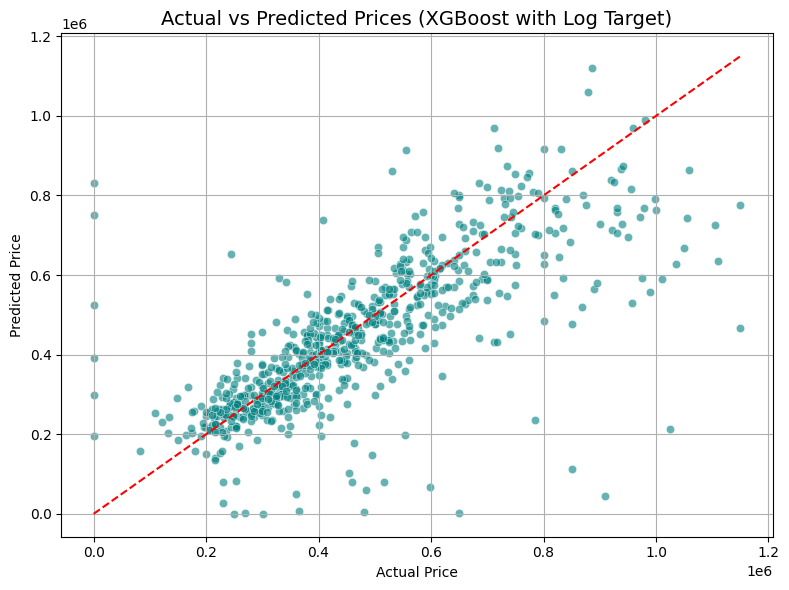

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, color='teal', alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         color='red', linestyle='--')

plt.title("Actual vs Predicted Prices (XGBoost with Log Target)", fontsize=14)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

### 📉 Actual vs Predicted Prices – (Log Transformed XGBoost)

This scatter plot shows how well the model predicted house prices compared to the actual values — but this time after training it on the **log-transformed target**.

Most of the points fall close to the red diagonal line, which is a good sign.
It means the model is learning the general pattern pretty well and giving reasonably accurate predictions for most houses.

But I can still see some points, especially on the higher end of the price range, that are **further from the line**.  
This tells me that the model still struggles a bit with predicting very expensive houses — maybe because they’re underrepresented in the training data.

Overall, this visualization confirms that applying the log transformation helped smooth out the predictions and reduce extreme errors. Still not perfect, but definitely a solid improvement over the untransformed version.


## **18. Residual Plot – Visualizing Prediction Errors**

After training the model and reversing the log transformation, I calculated the residuals by subtracting the predicted price from the actual price. This plot helps me visually check for patterns in the errors. Ideally, residuals should be randomly scattered around zero.

If I see any clear pattern, it could indicate that the model is underfitting or overfitting.

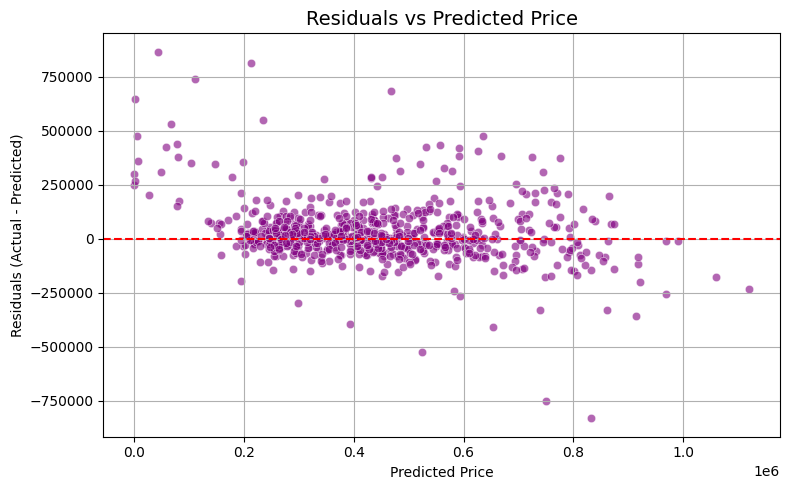

In [33]:
# Calculate residuals
residuals = y_test_actual - y_pred_actual

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_actual, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Price", fontsize=14)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📉 Residuals vs Predicted Price – XGBoost with Log Target

This plot shows the residuals (actual - predicted) plotted against the predicted house prices.  
Ideally, we want to see the residuals randomly scattered around the horizontal zero line.

In this case, the distribution looks fairly centered, which is a good sign.  
There are some larger residuals on both ends, especially for higher-priced houses. This might indicate that the model still struggles a bit with extreme values.

But overall, the residuals don’t show a strong pattern or trend — which means the model is **not clearly biased** in one direction (like consistently under- or overestimating).

This gives me more confidence that the model is doing a solid job for the majority of the price range.


## **19. Applying Cross-Validation (CV) to XGBoost Model**

Cross-validation helps us evaluate the model's performance on multiple different splits of the data.This gives a more reliable estimate of how well the model will perform on unseen data.

In this step, I’ll use 5-Fold Cross-Validation to calculate average performance scores like MAE, RMSE, and R².

In [34]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

# Define scoring functions
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False), greater_is_better=False)
r2_scorer = make_scorer(r2_score)

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost model yeniden eğit
from xgboost import XGBRegressor
xgb_cv_model = XGBRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
mae_scores = cross_val_score(xgb_cv_model, X, y, cv=cv, scoring=mae_scorer)
rmse_scores = cross_val_score(xgb_cv_model, X, y, cv=cv, scoring=rmse_scorer)
r2_scores = cross_val_score(xgb_cv_model, X, y, cv=cv, scoring=r2_scorer)

# Print mean scores (convert to positive)
print(f"CV Mean MAE: {-mae_scores.mean():.2f}")
print(f"CV Mean RMSE: {-rmse_scores.mean():.2f}")
print(f"CV Mean R²: {r2_scores.mean():.4f}")


CV Mean MAE: 0.34
CV Mean RMSE: 1.28
CV Mean R²: -0.2056


### ❗ Cross-Validation Results – Not as Expected

I applied 5-Fold Cross-Validation on the XGBoost model that I trained using the log-transformed price. Honestly, I was expecting similar or maybe even better performance compared to the normal test split.

But the results were kind of disappointing:

- **MAE: 0.34** – It’s in log scale, so not super intuitive, but still higher than I thought.
- **RMSE: 1.28** – That also feels too big.
- **R²: -0.2056** – This one surprised me the most. A negative R² basically means the model is doing worse than just predicting the average.

Even though the model looked decent when I tested it earlier, these CV results show that it might not be very stable or generalizable.

Maybe the log transformation changed the target too much, or maybe the model needs better tuning.Either way, this step was super helpful — it reminded me that just trusting one test result can be misleading.



## **20. Final Summary – House Price Detection Project**

In this project, I worked on predicting house prices using a real estate dataset.  
My main goal was to build regression models that could estimate sale prices based on various house features like size, location, condition, and more.

Here's what I did step by step:

- I started with cleaning the data and removed outliers using the IQR method.  
- I created new features like house age and renovation status.  
- I explored the dataset visually to better understand patterns and distributions.  
- I built and compared several regression models including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.  
- I selected **XGBoost** as the best-performing model based on MAE, RMSE, and R².  
- I applied **log transformation** to the target variable to reduce skewness, and re-trained the model.  
- I evaluated the predictions using scatter plots and residual analysis.  
- Finally, I applied **cross-validation** to test the model's generalization, and although the CV results weren’t perfect, they helped me understand the limitations of my approach.

---

### 🎯 What I Learned

- Outlier removal and feature engineering can significantly improve model performance.
- Log transformation can help with skewed targets, but it might not always improve generalization.
- Cross-validation is essential — even a model that performs well on one test split can fail on others.
- Visualization is a powerful tool not only for EDA but also for diagnosing model behavior.

---

### 🔮 If I Continue This Project

If I had more time, I’d like to:

- Tune the hyperparameters of the XGBoost model  
- Try other ensemble techniques or stacking models  
- Add location-based external data (e.g., average income, school ratings)  
- Try deploying the model using Streamlit or FastAPI

---

This project helped me practice the full data science pipeline — from data cleaning to model evaluation — and gave me a clearer idea of how to handle real-world problems in a structured way.
